In [1]:
import tensorflow as tf
from tensorflow.keras.layers import AveragePooling2D, Dropout, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
# from google.colab import files
import matplotlib.pyplot as plt
from keras.applications import VGG19
from keras.layers import Conv2D, MaxPooling2D,Dense,Activation,Dropout,Flatten,BatchNormalization
from keras.layers import Dense,Dropout,Input,MaxPooling2D,MaxPool2D,Conv2D,Flatten
from keras.models import Sequential
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam,SGD

# **Get The Kaggle Dataset**

[Dataset Link](https://www.kaggle.com/datasets/volkandl/car-brand-logos)

Get the Kaggle API KEY as mentioned in the [steps](https://www.kaggle.com/docs/api#authentication)

In [2]:
# !mkdir ~/.kaggle
# !touch ~/.kaggle/kaggle.json

# api_token = {"username":"<key>","key":"<value>"}

# import json

# with open('/root/.kaggle/kaggle.json', 'w') as file:
#     json.dump(api_token, file)

# !chmod 600 ~/.kaggle/kaggle.json

# **Download The Dataset**

In [3]:
# !kaggle datasets download -d volkandl/car-brand-logos


**Unzip The dataset**

In [4]:
# !unzip 'car-brand-logos.zip' -d car-brand-logos

# **Preprocess and analysis**

In [14]:
IMAGE_SIZE = 331
BATCH_SIZE = 64

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Train generator for train folder
train_generator = datagen.flow_from_directory(
    "Train",
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    class_mode="categorical",
    color_mode="rgb",
    batch_size=BATCH_SIZE)

# Test generator for test folder
test_generator = datagen.flow_from_directory(
    "Test",
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    class_mode="categorical",
    color_mode="rgb",
    batch_size=BATCH_SIZE)

Found 2513 images belonging to 8 classes.
Found 400 images belonging to 8 classes.


# **Create the  VGG19 model**

**We are creating a CNN model using keras with input shape as (331,331,3) which stands for 331x331 RGB pictures . Refer [link](https://keras.io/api/layers/convolution_layers/convolution2d/)**

**A dropout layer has been added to prevent overfitting [link](https://keras.io/api/layers/regularization_layers/dropout/)**

In [6]:
vgg = VGG19(include_top= False, weights = "imagenet", input_shape=( IMAGE_SIZE,IMAGE_SIZE, 3))
vgg_layer_list = vgg.layers

model = Sequential ()

for layer in vgg_layer_list:
    model.add(layer)

for layer in model.layers:
    layer.trainable = False


model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(8))
model.add(Activation('softmax'))
model.summary()

# opt = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999)
opt = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)           │ (None, 331, 331, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 331, 331, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 165, 165, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 165, 165, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 165, 165, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 82, 82, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 82, 82, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 82, 82, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 82, 82, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 82, 82, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 41, 41, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 41, 41, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 41, 41, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 41, 41, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 41, 41, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 20, 20, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 20, 20, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 20, 20, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 20, 20, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 20, 20, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 10, 10, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    52,429,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             

 Total params: 72,983,112 (278.41 MB)

 Trainable params: 52,958,728 (202.02 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)           │ (None, 331, 331, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 331, 331, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 165, 165, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 165, 165, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 165, 165, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 82, 82, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 82, 82, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 82, 82, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 82, 82, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 82, 82, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 41, 41, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 41, 41, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 41, 41, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 41, 41, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 41, 41, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 20, 20, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 20, 20, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 20, 20, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 20, 20, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 20, 20, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 10, 10, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    52,429,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             

 Total params: 72,983,112 (278.41 MB)

 Trainable params: 52,958,728 (202.02 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

# **Training the Keras Model**

In [8]:
epochs = 10

# checkpoint = ModelCheckpoint('model.{epoch:02d}-{val_loss:.2f}.h5',
#                              monitor='val_loss',
#                              verbose=0,
#                              save_best_only=True,
#                             mode='auto')
checkpoint = ModelCheckpoint('model.{epoch:02d}-{val_loss:.2f}.keras',
                             monitor='val_loss',
                             verbose=0,
                             save_best_only=True,
                             mode='auto')

history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=epochs,
                    validation_data=test_generator,
                    validation_steps=len(test_generator),
                    callbacks=[checkpoint])

Epoch 1/10


c:\Users\gasse\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/40 ━━━━━━━━━━━━━━━━━━━━ 595s 14s/step - accuracy: 0.2866 - loss: 10.3371 - val_accuracy: 0.6225 - val_loss: 2.7085
Epoch 2/10


c:\Users\gasse\AppData\Local\Programs\Python\Python310\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 151ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 516s 13s/step - accuracy: 0.5847 - loss: 2.5756 - val_accuracy: 0.6600 - val_loss: 2.1210
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 509s 12s/step - accuracy: 0.6472 - loss: 2.0150 - val_accuracy: 0.7000 - val_loss: 1.8641
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 491s 12s/step - accuracy: 0.6940 - loss: 1.6045 - val_accuracy: 0.7225 - val_loss: 1.4130
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 479s 12s/step -

In [10]:
epochs = 5

checkpoint = ModelCheckpoint('model.{epoch:02d}-{val_loss:.2f}.keras',
                             monitor='val_loss',
                             verbose=0,
                             save_best_only=True,
                             mode='auto')

history2 = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=epochs,
                    validation_data=test_generator,
                    validation_steps=len(test_generator),
                    callbacks=[checkpoint])

Epoch 1/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 512s 13s/step - accuracy: 0.7206 - loss: 1.3397 - val_accuracy: 0.7200 - val_loss: 1.3340
Epoch 2/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 502s 12s/step - accuracy: 0.7292 - loss: 1.1476 - val_accuracy: 0.7250 - val_loss: 1.2377
Epoch 4/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 483s 12s/step - accuracy: 0.7546 - loss: 0.9908 - val_accuracy: 0.7475 - val_loss: 1.1925


In [11]:
epochs = 5

checkpoint = ModelCheckpoint('model.{epoch:02d}-{val_loss:.2f}.keras',
                             monitor='val_loss',
                             verbose=0,
                             save_best_only=True,
                             mode='auto')

history3 = model.fit(test_generator,
                    steps_per_epoch=len(test_generator),
                    epochs=epochs,
                    validation_data=train_generator,
                    validation_steps=len(train_generator),
                    callbacks=[checkpoint])

Epoch 1/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 499s 80s/step - accuracy: 0.6845 - loss: 1.8772 - val_accuracy: 0.8400 - val_loss: 0.5525
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 606ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 482s 77s/step - accuracy: 0.6879 - loss: 1.6596 - val_accuracy: 0.8150 - val_loss: 0.6169
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 464s 74s/step - accuracy: 0.6965 - loss: 1.4688 - val_accuracy: 0.8086 - val_loss: 0.6662


In [12]:
epochs = 5

checkpoint = ModelCheckpoint('model.{epoch:02d}-{val_loss:.2f}.keras',
                             monitor='val_loss',
                             verbose=0,
                             save_best_only=True,
                             mode='auto')

history4 = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=epochs,
                    validation_data=test_generator,
                    validation_steps=len(test_generator),
                    callbacks=[checkpoint])

Epoch 1/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 487s 12s/step - accuracy: 0.7494 - loss: 1.0053 - val_accuracy: 0.8000 - val_loss: 0.7709
Epoch 2/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 478s 12s/step - accuracy: 0.7597 - loss: 0.9185 - val_accuracy: 0.7950 - val_loss: 0.7858
Epoch 4/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 481s 12s/step - accuracy: 0.7933 - loss: 0.7120 - val_accuracy: 0.7700 - val_loss: 0.8425


# **Loss and Accuracy Curves**

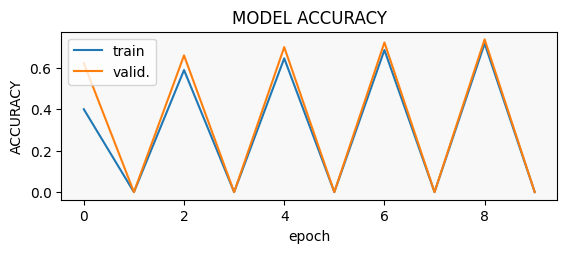

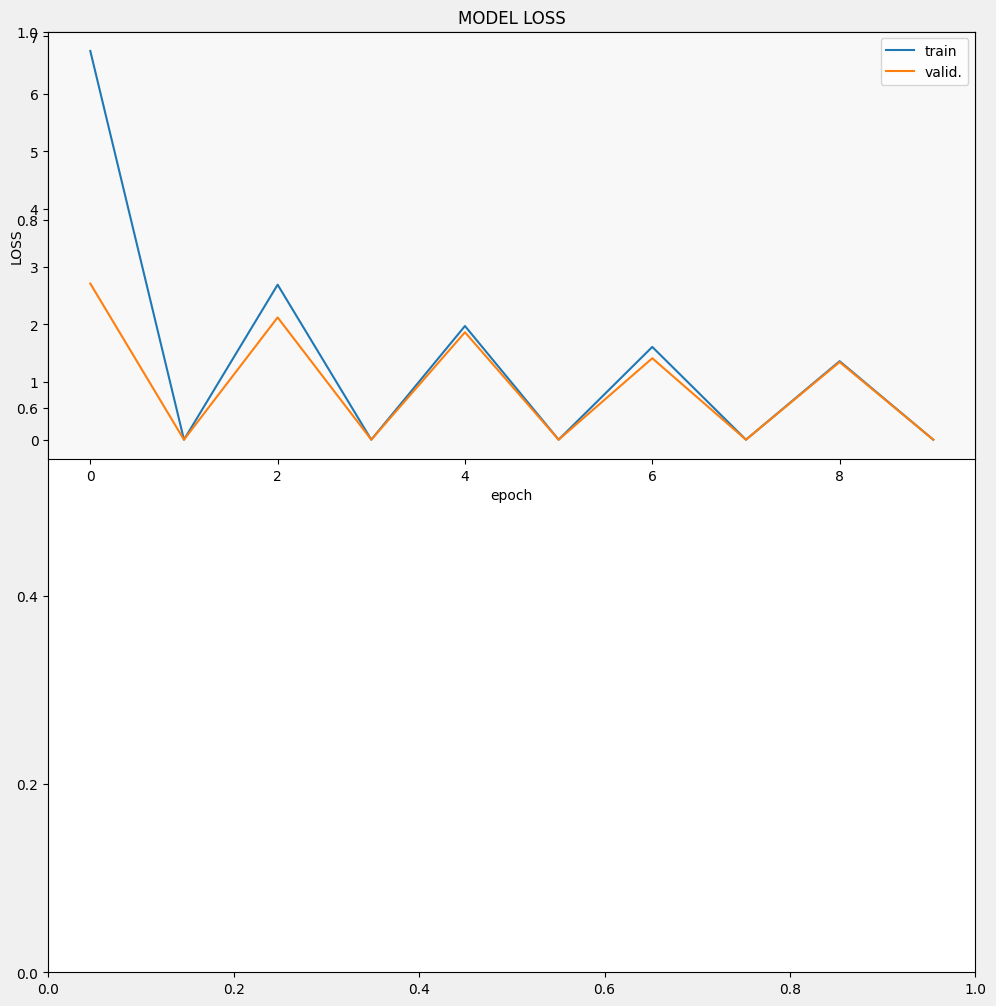

In [13]:
def display_training_curves(training, validation, title, subplot):
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('MODEL '+ title)
    ax.set_ylabel(title)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

display_training_curves(
    history.history['accuracy'],
    history.history['val_accuracy'],
    'ACCURACY',
    212,
)


display_training_curves(
    history.history['loss'],
    history.history['val_loss'],
    'LOSS',
    211,
)


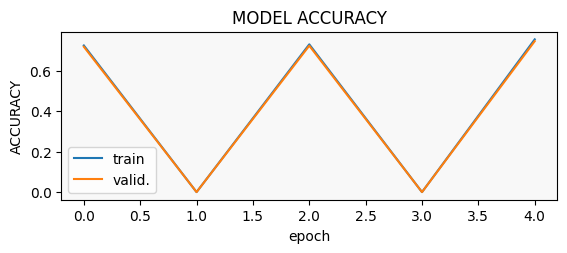

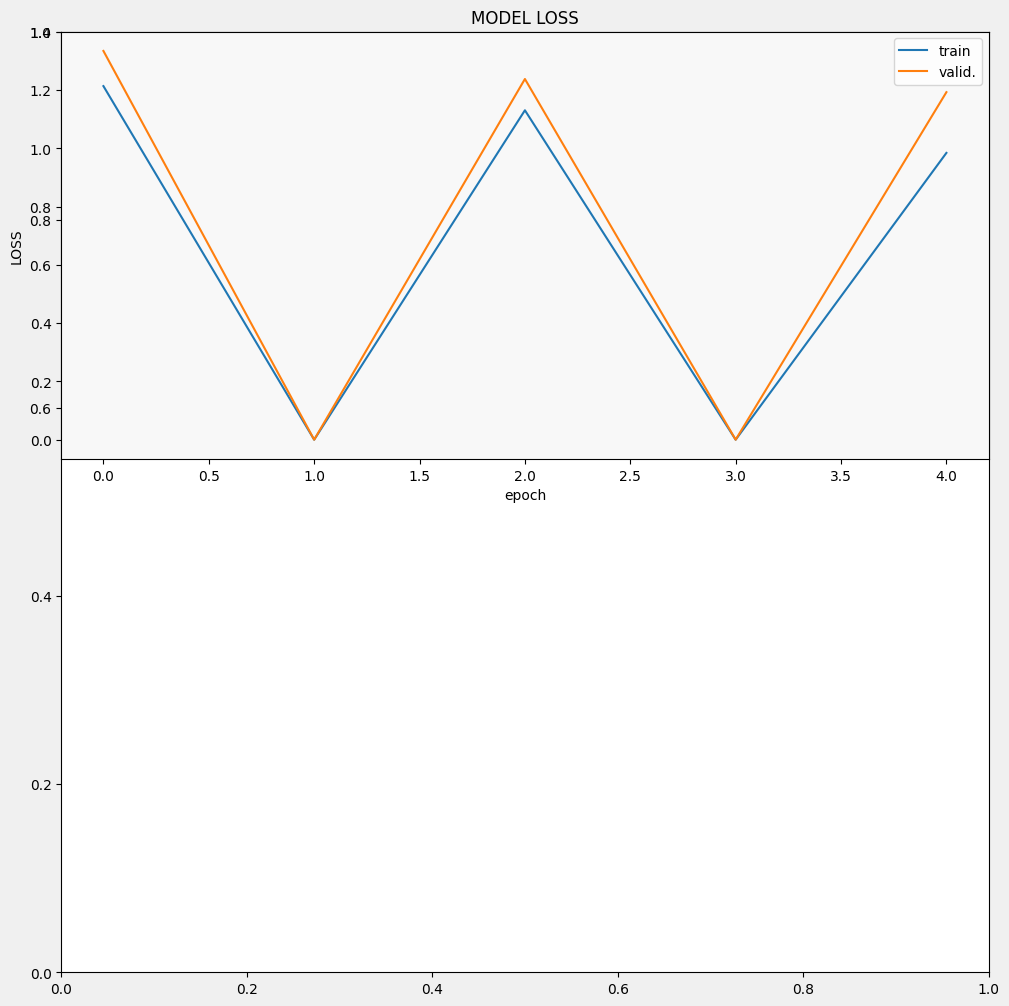

In [14]:
display_training_curves(
    history2.history['accuracy'],
    history2.history['val_accuracy'],
    'ACCURACY',
    212,
)


display_training_curves(
    history2.history['loss'],
    history2.history['val_loss'],
    'LOSS',
    211,
)


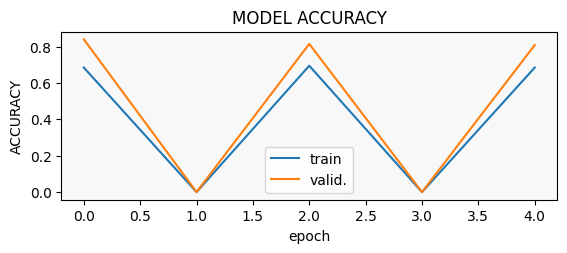

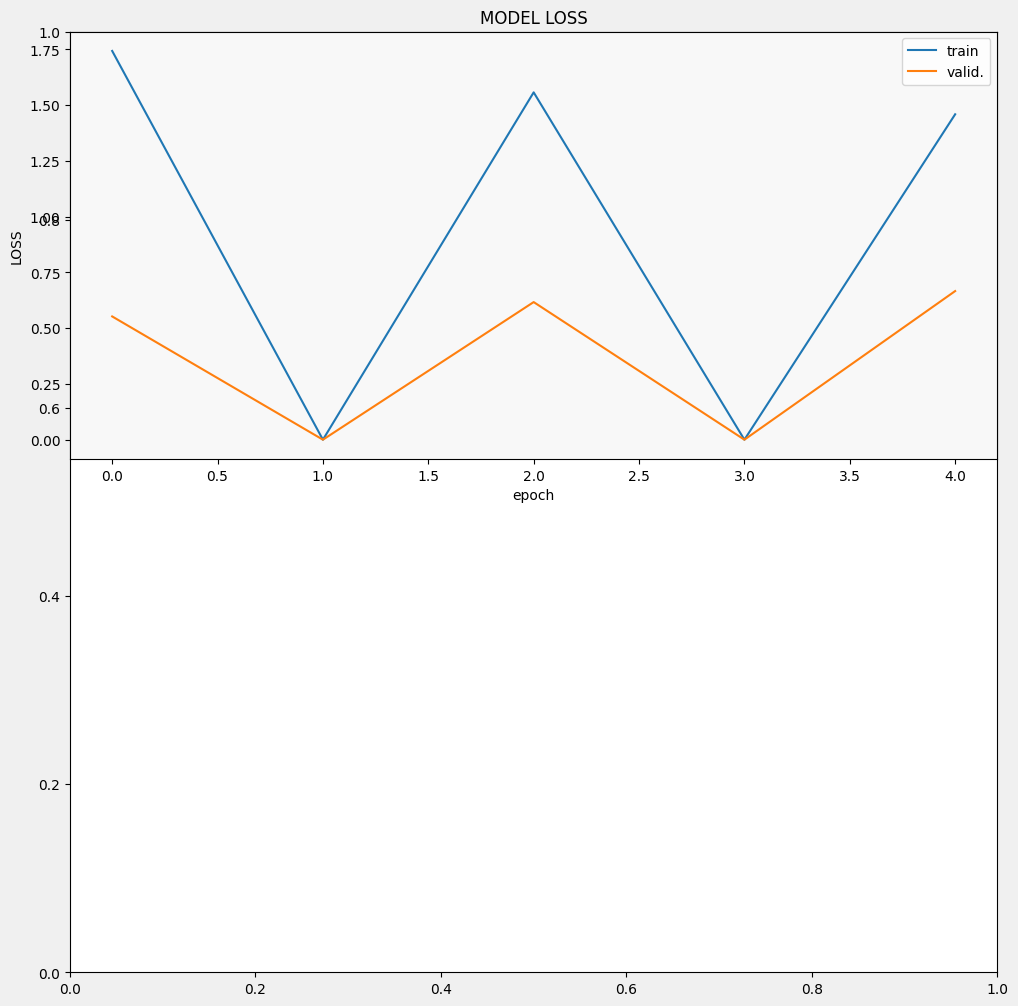

In [15]:
display_training_curves(
    history3.history['accuracy'],
    history3.history['val_accuracy'],
    'ACCURACY',
    212,
)


display_training_curves(
    history3.history['loss'],
    history3.history['val_loss'],
    'LOSS',
    211,
)


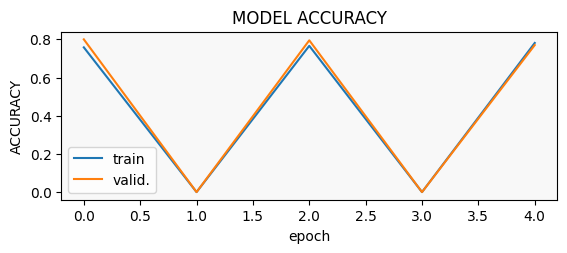

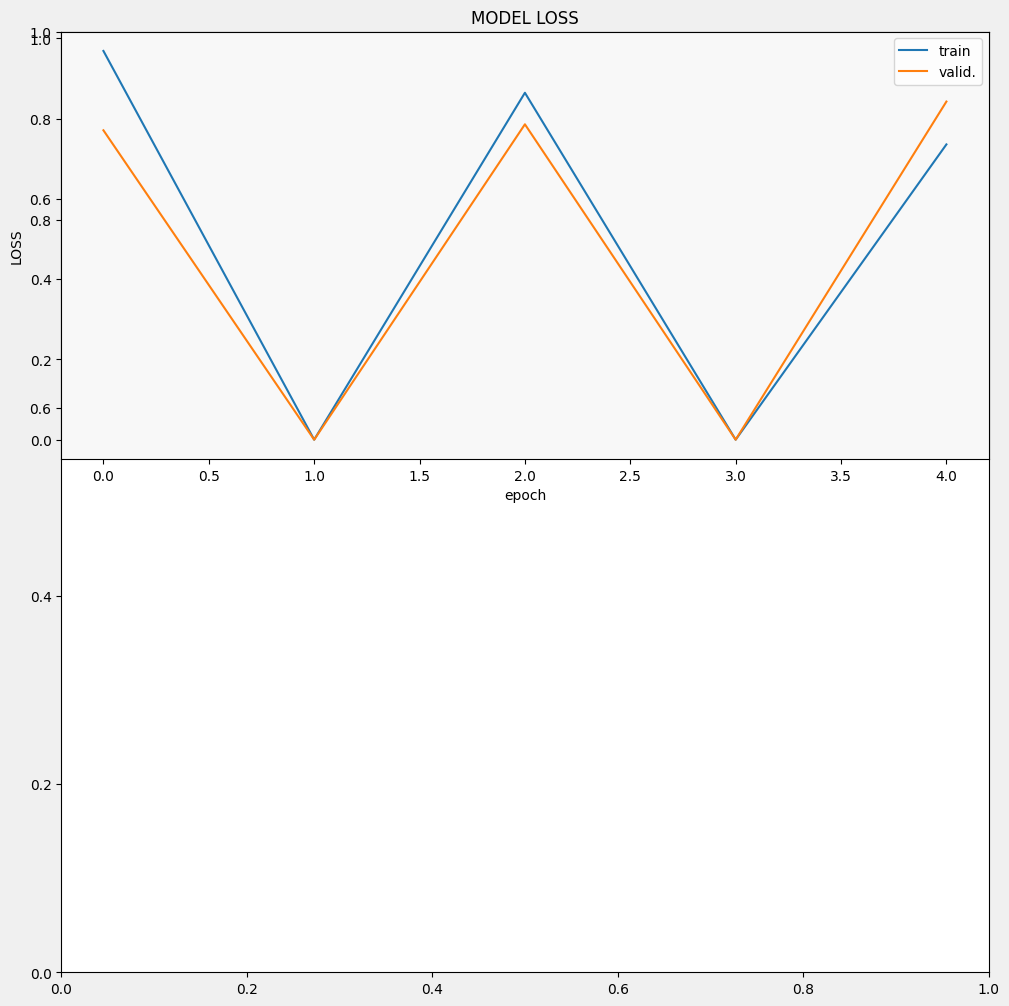

In [16]:
display_training_curves(
    history4.history['accuracy'],
    history4.history['val_accuracy'],
    'ACCURACY',
    212,
)


display_training_curves(
    history4.history['loss'],
    history4.history['val_loss'],
    'LOSS',
    211,
)


# **Accuracy**

In [17]:
score = model.evaluate(test_generator,batch_size=32)
print("Accuracy: {:.2f}%".format(score[1] * 100))
print("Loss: ",score[0])

7/7 ━━━━━━━━━━━━━━━━━━━━ 74s 10s/step - accuracy: 0.7800 - loss: 0.8536
Accuracy: 77.25%
Loss:  0.8528997898101807


In [18]:
score = model.evaluate(train_generator,batch_size=32)
print("Accuracy: {:.2f}%".format(score[1] * 100))
print("Loss: ",score[0])

40/40 ━━━━━━━━━━━━━━━━━━━━ 437s 11s/step - accuracy: 0.8618 - loss: 0.4554
Accuracy: 87.07%
Loss:  0.42869946360588074


# **Save The Model**

Refer the [docs](https://www.tensorflow.org/guide/keras/save_and_serialize) from the Tensorflow

In [26]:
# Check if the directory exists, if not create it
import os


if not os.path.exists('model'):
    os.makedirs('model')

# Save the model
# model.save('model')
model.save('model/model.keras')


In [ ]:
!zip -r model.zip /content/model

# **Reconstruct the model and check the predicted accuracy**

In [15]:
reconstructed_model = tf.keras.models.load_model('model/model.keras')
score = reconstructed_model.evaluate(test_generator,batch_size=32)
print("Accuracy: {:.2f}%".format(score[1] * 100))
print("Loss: ",score[0])

score = reconstructed_model.evaluate(train_generator,batch_size=32)
print("Accuracy: {:.2f}%".format(score[1] * 100))
print("Loss: ",score[0])

c:\Users\gasse\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 82s 11s/step - accuracy: 0.8033 - loss: 0.8711
Accuracy: 79.25%
Loss:  0.8952857851982117
40/40 ━━━━━━━━━━━━━━━━━━━━ 503s 13s/step - accuracy: 0.8658 - loss: 0.4765
Accuracy: 87.03%
Loss:  0.4662419855594635


# **Test With Random Images**

In [19]:
class_names=train_generator.class_indices

labels={}
for key, value in class_names.items():
    labels[value]=key

In [20]:
labels

{0: 'hyundai',
 1: 'lexus',
 2: 'mazda',
 3: 'mercedes',
 4: 'opel',
 5: 'skoda',
 6: 'toyota',
 7: 'volkswagen'}

# **Predict for sample images**

Make sure the image focuses the logo

In [9]:
IMAGE_SIZE = 331
BATCH_SIZE = 64

In [21]:
import cv2
import numpy as np
import tensorflow as tf
# from google.colab.patches import cv2_imshow

def GetResultForImage(image_location):
  img = cv2.imread(image_location, cv2.IMREAD_UNCHANGED)

  print('Original Dimensions : ',img.shape)
  resized = cv2.resize(img,(IMAGE_SIZE,IMAGE_SIZE),3)
  result = np.expand_dims(resized, axis=0)
  result=reconstructed_model.predict(result)
  print(labels[np.argmax(result)])
  cv2.imshow('img',resized)
  cv2.waitKey(0)

In [18]:
import urllib.request
#hyundai
urllib.request.urlretrieve("https://images.unsplash.com/photo-1588036873025-7261a5647adf?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=2220&q=80", "hyundai-1.jpg")
urllib.request.urlretrieve("https://images.unsplash.com/photo-1471977360223-d8cc63cec57c?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=2340&q=80", "hyundai-2.jpg")

#lexus
urllib.request.urlretrieve("data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAASwAAACoCAMAAABt9SM9AAAAeFBMVEX///8AAAD29vaysrJ6enpHR0fGxsZ0dHQpKSn5+fmmpqZjY2NtbW3W1tbo6OhLS0uMjIw3Nzfw8PBfX1+dnZ28vLzi4uKSkpLPz8+srKy2trZQUFAiIiLk5OTc3NwTExOEhISPj48ZGRk+Pj4xMTFYWFgLCwsdHR0qW3nfAAAJyUlEQVR4nO2d22LiIBCG10NTE020qfFUtbGt9v3fcGs0BJjhnBqxfFe7FhV+YRhmgPz7FwgEAoFAIBAIBAKBQCAQCAQCN6Cf7dNVdCZNs7zr2twpi2I+fP3qAbZvw3mxj7uu3t2QJs8jqBLLabyM/nw/WyRHlU4Nn4uuq9sh6eykr1RFv+sqd0Q+f0dG23G4HESrfZbna0ys6OeNvemm67rfmHTM6/BUbvZMkRdErJ+XqzeWf8h+RZ+sBi/LFSizwDvW5vrPyR+xXykr1dMA7SaIVsufl4fkf5M/0Lv6E0aAuaDJU6jVsfpDXpIXZjesdicwdvulEBU7QK3e67/ljb2LblPpbug/0VKJmxohgzBr/pwSJ3Zyg0p3xIpuvLBX/WiKaMUqm5DXH9XQL6m2H2QFEa+Bt085mSUGv1jj7qBcq9FOVrCEWk1hKSJ9+TvV7RTKXJXSgpjBwsqRQf14hotyriTW6occ0Qo3TPnH9c9vv1HhDvlUtZyAGCyhWarLvrZd3U55JQ0/KRzvGdTqWVx6qi7iHY0CJ0WUZQW1+pKVr/vWvM3qdkrRtFyhFeZhSbtiXAd64FLcTyiTnSmKPkGtFEuarC73IHH6RgHVz7+EWkm91zN1t32MKbFZmqgMyx5q9aT+/DqM8QiufGOGEDecBTFYOoOrLttCZbvmmTRclW54hVqlOt8wuBYunevaNcQA99aKkkiKQtMh2F6Lq6aPu4cERkeKghnUStdm1zbed9e0cRtUUU0kK639LboD/c451O14URQcQq20DFbF/PqOpVtlu0a3YyFxGYOWkyHsVtmOIRqc5OViqJWqKzLU+2+8XvSQwaWY15DMl1FasHb9hy6V7RrSdPmsPodamfnjJFjhUtmOITl4aZgFS9UfDb+pfp/HyR7iZ8qN9QcUyzSGUDseKs/3jiEmS2p4Ea9BHqZHqH1fj40WibzLvEXEazCPqR+u7/y0r2zXkNZLyiBeg0Ugb63xTfcN0UG2yEM2lVps7SORa28DpsSxlqxwkViDMu6FQHwHbyMPJPJZCotgKVWbXWpErL267H2S1i0Q++9vUCurrBYRS3/1fWcQsYR79Aqo1bfVV/kv1k45DJGN8HZrYSKWdH/OPUMM0lhQIIFaiYoqIF3U3225dQtECS2olW2wkyzFrevaOT15EzZQK9s9C/Vyx87i3QVkrsP7C0zWK2KEYhxH8T1ANjyiQWXExzJeQF8hQR6Pd9MQs4uGaKDf8I4V04FskvA4rkzWO6iFh9tArHeHkk+wr2v3ED8KM1owjmVrcUgfNQ2w3hXEaGGBhAkQy7Zj1Pl7nwOllGONjUNELLtx2Pi23gZoKkgzkNDJAYrV630+GdPk0Tx2HM7IzkEgq2hHPJ4LzzRb2RAT37ZWRknse4TsZSvh35AtpE54f/ywcdMRq6W8/MII7zsW5U0hofV4K2u8Kd5GlBuaVBfmBBlcGKLC931/FQPSHCzzUrTWuW7esF+B+EFb9M8rJH1vgbfxZJbGfRCl5bNovSyHDpSJ3747RXPUy+N9Gzej2axWdl0VDxj+St+K51eSFj/0Dhgr7ZY55Iy0vxscBDTxmK+WUnvNTmh/c4UiKAfBNi2Bf97oYSZCCmpL8ti5fc12wcc6eU+gD4u7meSsWSV5nPuS06dud/i2H4tZc4TR300zGtCnAz7szunS1wU+xNpZTM7sXpuZLuj6CRUC2z5yt7oQMWGGr7m+j5SvmSM+Xqe9tNmwN5S+l4XaUcqjkg2rPpjTLqHg7t7snSbzSDQkF8WczzB+/I1eVbNHg1hP43KZrIsL62Q5HPOqnhl7n5gwp0Ay0mqm60d02HWIym8jpSYbz4+MO5IXJTbUAB+T9QNkb9pgV8yfp6L7zr9eZ4P0r449Mfl+VWySZHkhSTZRugsqBQKBQCAQCAQCgcANiI6vhKP9PXDZqhgMEgt0PjyZYSjDpdGAAt0j30+ZMkLqy5MG9ArfLre0mmlFWXBOyshLLvh0ZS6aiS7CpkVD5HFlOPXvwpy9tRBr57zLUZFURg4HX1AePnmmS/N7nZALzsTU/d9NrAy5ttaYqSQOE4u/wEUs9CF3Yurf00ks4zMSnyn6sjAFwZzvGe2ZU9X2YokGtpAWxIrNTdXXvxi5UUW0fTJjxBlwD7iwFgv/wWS4i4Vc8KvkfPkfcvUFvsXtQBeormhpRSyL02jOYiG3t6upbkrcoQcF+MOuzI1tx4uWbYgFHpPxOlExrutmKxbQamhwkyM6gzLHWPuMYa9tWgticePh3Wjrk6VY4FIGs0QV9tgm2uViJvamVi2IxfpWhifQLcXi/TnTTbC4nb/ahpQepyfK93YXi30QmeklcHZi8Q+gtdhcjdr5s8sVM40s6fc4i8UNQtNEm5VY/IRitbMTt/MrpkJbySOAbcRif2TjfUtWYvEtNP3SK8qVEr+wdxXLsWNZiQXWVYXW2h1OPKidJ7yALVuuYrErDo3n1HDYiCVtoqTx8JP6qJ2/gIxtV7HYaWk0VlNu6KnLQix5fxCD/pKonT8XxuZXR7F2PRuOzUZfC7GQ54BqgXf7HbpHCw9DOooljPYoIO6yhVi2oT6RjUDtPOpZO4qFPDxRj21sLVZ+ITYdjkKDGmEhS6wujmLx3qE+39Zi/UPeqYNYLNTjGkFP11Es5ImAukzcxDKKy1YIHs7QF17uAG7dchRLMvUqSYFYBvdXwVnsrchjOZof1MD/eI5ixUURrQDRKt0DCv5BulV6hMnu6F/UDx+eancf0+ILfBDNlnUgmBYoIwbShIWSZ7Ym1SqFtdK6W6fBw1M/7DZds14IZueZWZER60P14W5i8YGVc2dgn+OifKrnFWBmrLRif6hRis7t9FBkv1b1nY5iHZBfjX1JL4YHnAaLJynwhr0KAWC5hG0zK07gOyQ4isWlrqomcv64llq8obG5jZU17OO6m2C+EPkpuPorupajWNwzuarQNh8g1tjvAKy7+R6JPaP3N3XOEnPf6lmai6ON5PFZN7H4elz6NzAUz5tVKmMPssSzyBC2O7PxhZyftXvEQQXPnTnIsiTMMspQrD6fP67vyJbP3r/OGPQPLNF9GYpIMv9lKuCNWRe8j0yAi3vyg7Z7954Z75h/htn5alZEnsF2IxqPGnm+4I0QRe+Rw4jVrGi+yGoH2t3rqA5vYguNJdnPQ9E6zOIE+3yXfjuXyZkhvdkB2+pyHoq2cVoXgEcXr288GD9ViVnEzldDcXPjik7Rs+5xNJ847Hg0QyPXuEceE1n1xn4xO2rvcXTjbSm/qSPu34AWTl32swVwAfeLXaYgV9UsHAgNBAKBQCAQCAQCgUAgEAgE/hj/AdyQhnaNg4ZaAAAAAElFTkSuQmCC", "lexus-1.jpg")
urllib.request.urlretrieve("https://th.bing.com/th/id/R.c35db0488533309e9b856a30a184e6c7?rik=jToGlPDalY0HDA&pid=ImgRaw&r=0", "lexus-2.jpg")

#mazda
urllib.request.urlretrieve("https://www.shutterstock.com/image-photo/bangkokthailand-may-222014-logo-brand-260nw-204080434.jpg","mazda-1.jpg")
urllib.request.urlretrieve("https://www.schoolphotoproject.com/_picture-of-cars-motorbikes/car-mazda-logo-photo-l.jpg","mazda-2.jpg")


#mercedes
urllib.request.urlretrieve("https://media.gettyimages.com/id/2021660317/photo/mercedes-benz-group-ag-annual-figures.jpg?b=1&s=594x594&w=0&k=20&c=OdStstN1SelPYIqdu5SMgnOU2zJPS9608UxrCDEWSN4=","mercedes-1.jpg")
urllib.request.urlretrieve("https://th.bing.com/th/id/R.ca2fc31ceff5797eb4c31273effdb7db?rik=095liJWl3x4LAA&pid=ImgRaw&r=0","mercedes-2.jpg")
urllib.request.urlretrieve("https://performancedrive.com.au/wp-content/uploads/2021/06/2022-Mercedes-Benz-EQB-750x447.jpeg","mercedes-3.jpg")

#opel
urllib.request.urlretrieve("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQESUxbt7oUoBmKslA5YNh3b0NcXUojMM3Aeg&usqp=CAU","opel-1.jpg")
urllib.request.urlretrieve("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRgyyB9T1otFMlgiMojMr3GE03fFoEsU6reQA&usqp=CAU","opel-2.jpg")


#skoda
urllib.request.urlretrieve("https://thumbs.dreamstime.com/b/bordeaux-aquitaine-france-skoda-logo-brand-car-dealership-text-sign-vehicle-store-showroom-shop-czech-bordeaux-aquitaine-france-219259318.jpg","skoda-1.jpg")
urllib.request.urlretrieve("https://media.gettyimages.com/id/1230550013/photo/a-skoda-logo-seen-on-a-parked-car-in-dublin-city-center-on-tuesday-january-11-in-dublin.jpg?s=612x612&w=gi&k=20&c=b8xHL2cUjvyQC1jGIVLqgglYVZGB7RGWqd5QV2VD5cw=","skoda-2.jpg")


#toyota
urllib.request.urlretrieve("https://us.123rf.com/450wm/engdao/engdao1904/engdao190400491/engdao190400491.jpg?ver=6","toyota-1.jpg")
urllib.request.urlretrieve("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQLednVkQl--Dx9jOqUFk1t5EXfTkzyiiWPOw&usqp=CAU","toyota-2.jpg")

#volkswagen
urllib.request.urlretrieve("https://www.thedrive.com/content/2020/04/vw-logo-atlas.jpg?quality=85&crop=16%3A9&auto=webp&optimize=high&quality=70&width=1440","volkswagen-1.jpg")
urllib.request.urlretrieve("https://m.media-amazon.com/images/I/51SsqpaeYOL.jpg","volkswagen-2.jpg")


('volkswagen-2.jpg', <http.client.HTTPMessage at 0x196ef830940>)

In [37]:
# import cv2

# # Your GetResultForImage function might look something like this:
# def GetResultForImage(image_path):
#     img = cv2.imread(image_path)
#     cv2.imshow('image', img)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()

In [23]:
GetResultForImage("hyundai-1.jpg")
GetResultForImage("hyundai-2.jpg")


GetResultForImage("lexus-1.jpg")
GetResultForImage("lexus-2.jpg")


GetResultForImage("mazda-1.jpg")
GetResultForImage("mazda-2.jpg")


GetResultForImage("mercedes-1.jpg")
GetResultForImage("mercedes-2.jpg")



GetResultForImage("opel-1.jpg")
GetResultForImage("opel-2.jpg")

GetResultForImage("skoda-1.jpg")
GetResultForImage("skoda-2.jpg")

GetResultForImage("toyota-1.jpg")
GetResultForImage("toyota-2.jpg")


GetResultForImage("volkswagen-1.jpg")
GetResultForImage("volkswagen-2.jpg")

Original Dimensions :  (1591, 2220, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step
hyundai
Original Dimensions :  (1560, 2340, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step
hyundai
Original Dimensions :  (168, 300, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step
lexus
Original Dimensions :  (1406, 2500, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step
mercedes
Original Dimensions :  (280, 390, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step
mazda
Original Dimensions :  (1704, 2272, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step
mazda
Original Dimensions :  (362, 594, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step
mercedes
Original Dimensions :  (1067, 1600, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step
mercedes
Original Dimensions :  (192, 263, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 641ms/step
opel
Original Dimensions :  (169, 299, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step
opel
Original Dimensions :  (534, 800, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step
skoda
Original Dimensions :  (408, 612, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step
s